In [77]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from tqdm import tqdm
import argparse
import random
import cv2
import os

In [121]:
# initialize the data and labels
data = []
labels = []
image_paths = list(np.array(glob("data/Images/*")))

print('There are %d Images.' % len(image_paths))


def resize_image(imagePath, rows, cols):
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (rows, cols))
    image = img_to_array(image)
    return image

There are 23906 Images.


Original image resolution 768 x 1024


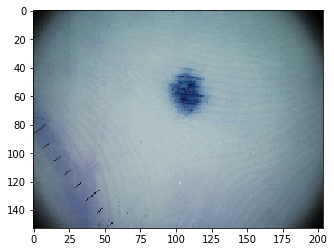

In [122]:
image = cv2.imread(image_paths[np.random.randint(len(image_paths))])
print("Original image resolution {} x {}".format(image.shape[0], image.shape[1]))
image = cv2.resize(image, (int(image.shape[1] * 0.2) , int(image.shape[0] * 0.2)))
plt.imshow(np.asarray(image))
plt.show()

In [119]:
!mkdir data/resizeimage

In [123]:
image_paths = np.random.choice(image_paths, 5000, replace=False)

In [124]:
for imagePath in tqdm(image_paths):
    # load the image, pre-process it, and store it in the data list
    try:
        image = resize_image(imagePath, 450 , 600)
        status = cv2.imwrite("data/resizeimage/{}".format(imagePath.split('/')[2], image))
    except Exception as e:
        pass



  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 1/5000 [00:00<15:41,  5.31it/s]

  0%|          | 5/5000 [00:00<12:14,  6.80it/s]

  0%|          | 8/5000 [00:00<10:03,  8.27it/s]

  0%|          | 9/5000 [00:01<29:08,  2.86it/s]

  0%|          | 10/5000 [00:02<41:50,  1.99it/s]

  0%|          | 11/5000 [00:02<36:44,  2.26it/s]

  0%|          | 13/5000 [00:02<27:14,  3.05it/s]

  0%|          | 16/5000 [00:02<20:31,  4.05it/s]

  0%|          | 18/5000 [00:03<21:44,  3.82it/s]

  0%|          | 19/5000 [00:03<19:00,  4.37it/s]

  0%|          | 21/5000 [00:03<15:09,  5.47it/s]

  0%|          | 23/5000 [00:03<12:37,  6.57it/s]

  0%|          | 25/5000 [00:04<12:44,  6.51it/s]

  1%|          | 28/5000 [00:04<10:44,  7.72it/s]

  1%|          | 31/5000 [00:04<09:24,  8.80it/s]

  1%|          | 35/5000 [00:05<11:53,  6.96it/s]

  1%|          | 37/5000 [00:05<10:14,  8.07it/s]

  1%|          | 40/5000 [00:05<08:39,  9.55it/s]

  1%|          | 46/5000 [00:06<06:53, 11.

  7%|▋         | 333/5000 [00:38<09:24,  8.27it/s]

  7%|▋         | 336/5000 [00:38<07:59,  9.73it/s]

  7%|▋         | 338/5000 [00:38<07:22, 10.54it/s]

  7%|▋         | 340/5000 [00:39<15:17,  5.08it/s]

  7%|▋         | 341/5000 [00:39<14:02,  5.53it/s]

  7%|▋         | 342/5000 [00:39<13:04,  5.94it/s]

  7%|▋         | 343/5000 [00:40<12:31,  6.19it/s]

  7%|▋         | 345/5000 [00:40<10:30,  7.38it/s]

  7%|▋         | 346/5000 [00:40<10:34,  7.34it/s]

  7%|▋         | 352/5000 [00:40<08:12,  9.44it/s]

  7%|▋         | 354/5000 [00:40<09:07,  8.49it/s]

  7%|▋         | 356/5000 [00:41<11:25,  6.77it/s]

  7%|▋         | 358/5000 [00:41<14:09,  5.46it/s]

  7%|▋         | 360/5000 [00:41<11:50,  6.53it/s]

  7%|▋         | 364/5000 [00:42<09:21,  8.26it/s]

  7%|▋         | 366/5000 [00:42<09:00,  8.57it/s]

  7%|▋         | 368/5000 [00:42<11:43,  6.58it/s]

  7%|▋         | 370/5000 [00:42<09:35,  8.05it/s]

  7%|▋         | 373/5000 [00:43<08:02,  9.58it/s]

  8%|▊      

 13%|█▎        | 633/5000 [01:16<12:14,  5.95it/s]

 13%|█▎        | 634/5000 [01:16<11:34,  6.28it/s]

 13%|█▎        | 635/5000 [01:17<24:38,  2.95it/s]

 13%|█▎        | 636/5000 [01:17<20:20,  3.58it/s]

 13%|█▎        | 637/5000 [01:17<17:14,  4.22it/s]

 13%|█▎        | 640/5000 [01:17<13:20,  5.45it/s]

 13%|█▎        | 645/5000 [01:18<10:12,  7.11it/s]

 13%|█▎        | 647/5000 [01:18<16:31,  4.39it/s]

 13%|█▎        | 649/5000 [01:19<16:44,  4.33it/s]

 13%|█▎        | 653/5000 [01:19<13:35,  5.33it/s]

 13%|█▎        | 654/5000 [01:19<12:46,  5.67it/s]

 13%|█▎        | 655/5000 [01:20<14:54,  4.86it/s]

 13%|█▎        | 657/5000 [01:20<12:10,  5.95it/s]

 13%|█▎        | 658/5000 [01:20<11:33,  6.26it/s]

 13%|█▎        | 660/5000 [01:20<10:18,  7.01it/s]

 13%|█▎        | 662/5000 [01:20<08:57,  8.07it/s]

 13%|█▎        | 663/5000 [01:21<09:18,  7.76it/s]

 13%|█▎        | 665/5000 [01:21<09:44,  7.42it/s]

 13%|█▎        | 666/5000 [01:21<10:02,  7.20it/s]

 13%|█▎     

 19%|█▉        | 945/5000 [01:55<11:10,  6.05it/s]

 19%|█▉        | 948/5000 [01:55<09:00,  7.50it/s]

 19%|█▉        | 950/5000 [01:55<07:50,  8.60it/s]

 19%|█▉        | 954/5000 [01:55<06:25, 10.50it/s]

 19%|█▉        | 956/5000 [01:56<08:41,  7.75it/s]

 19%|█▉        | 959/5000 [01:56<07:16,  9.25it/s]

 19%|█▉        | 961/5000 [01:56<06:38, 10.15it/s]

 19%|█▉        | 963/5000 [01:56<07:25,  9.07it/s]

 19%|█▉        | 965/5000 [01:57<13:27,  5.00it/s]

 19%|█▉        | 967/5000 [01:57<11:04,  6.07it/s]

 19%|█▉        | 972/5000 [01:58<08:34,  7.83it/s]

 20%|█▉        | 975/5000 [01:58<08:07,  8.26it/s]

 20%|█▉        | 977/5000 [01:59<13:52,  4.83it/s]

 20%|█▉        | 979/5000 [01:59<11:20,  5.91it/s]

 20%|█▉        | 981/5000 [01:59<09:32,  7.03it/s]

 20%|█▉        | 983/5000 [01:59<08:13,  8.13it/s]

 20%|█▉        | 985/5000 [01:59<07:48,  8.56it/s]

 20%|█▉        | 987/5000 [02:00<08:38,  7.74it/s]

 20%|█▉        | 988/5000 [02:00<08:52,  7.53it/s]

 20%|█▉     

 25%|██▍       | 1247/5000 [02:32<09:58,  6.27it/s]

 25%|██▍       | 1249/5000 [02:32<09:42,  6.44it/s]

 25%|██▌       | 1250/5000 [02:33<13:12,  4.73it/s]

 25%|██▌       | 1251/5000 [02:33<11:54,  5.25it/s]

 25%|██▌       | 1252/5000 [02:33<10:54,  5.73it/s]

 25%|██▌       | 1253/5000 [02:33<11:45,  5.31it/s]

 25%|██▌       | 1254/5000 [02:33<11:46,  5.30it/s]

 25%|██▌       | 1255/5000 [02:34<10:50,  5.76it/s]

 25%|██▌       | 1256/5000 [02:34<10:11,  6.12it/s]

 25%|██▌       | 1260/5000 [02:34<08:11,  7.61it/s]

 25%|██▌       | 1261/5000 [02:34<10:52,  5.73it/s]

 25%|██▌       | 1262/5000 [02:35<23:30,  2.65it/s]

 25%|██▌       | 1266/5000 [02:35<17:23,  3.58it/s]

 25%|██▌       | 1268/5000 [02:36<15:12,  4.09it/s]

 25%|██▌       | 1269/5000 [02:36<26:00,  2.39it/s]

 25%|██▌       | 1270/5000 [02:37<20:59,  2.96it/s]

 25%|██▌       | 1274/5000 [02:37<15:35,  3.98it/s]

 26%|██▌       | 1276/5000 [02:37<12:28,  4.98it/s]

 26%|██▌       | 1278/5000 [02:37<10:11,  6.09

 31%|███       | 1534/5000 [03:11<07:41,  7.51it/s]

 31%|███       | 1536/5000 [03:11<06:50,  8.44it/s]

 31%|███       | 1539/5000 [03:11<05:50,  9.87it/s]

 31%|███       | 1541/5000 [03:12<07:43,  7.46it/s]

 31%|███       | 1543/5000 [03:12<06:52,  8.37it/s]

 31%|███       | 1546/5000 [03:12<05:49,  9.87it/s]

 31%|███       | 1548/5000 [03:13<13:02,  4.41it/s]

 31%|███       | 1549/5000 [03:14<24:12,  2.38it/s]

 31%|███       | 1554/5000 [03:14<18:07,  3.17it/s]

 31%|███       | 1556/5000 [03:14<14:02,  4.09it/s]

 31%|███       | 1558/5000 [03:15<11:45,  4.88it/s]

 31%|███       | 1559/5000 [03:15<11:39,  4.92it/s]

 31%|███       | 1560/5000 [03:15<10:33,  5.43it/s]

 31%|███       | 1562/5000 [03:15<08:39,  6.61it/s]

 31%|███▏      | 1569/5000 [03:15<06:19,  9.04it/s]

 31%|███▏      | 1572/5000 [03:15<05:23, 10.60it/s]

 32%|███▏      | 1575/5000 [03:16<05:49,  9.80it/s]

 32%|███▏      | 1577/5000 [03:16<05:26, 10.48it/s]

 32%|███▏      | 1580/5000 [03:16<04:47, 11.91

 37%|███▋      | 1843/5000 [03:49<05:28,  9.61it/s]

 37%|███▋      | 1849/5000 [03:49<04:24, 11.90it/s]

 37%|███▋      | 1852/5000 [03:50<04:01, 13.05it/s]

 37%|███▋      | 1858/5000 [03:50<03:06, 16.86it/s]

 37%|███▋      | 1861/5000 [03:51<07:13,  7.24it/s]

 37%|███▋      | 1865/5000 [03:51<05:56,  8.80it/s]

 37%|███▋      | 1867/5000 [03:51<06:06,  8.55it/s]

 37%|███▋      | 1869/5000 [03:51<05:32,  9.43it/s]

 37%|███▋      | 1871/5000 [03:51<05:07, 10.17it/s]

 37%|███▋      | 1873/5000 [03:52<05:49,  8.94it/s]

 38%|███▊      | 1875/5000 [03:52<06:14,  8.34it/s]

 38%|███▊      | 1877/5000 [03:52<05:34,  9.34it/s]

 38%|███▊      | 1879/5000 [03:52<06:15,  8.31it/s]

 38%|███▊      | 1880/5000 [03:53<08:45,  5.93it/s]

 38%|███▊      | 1883/5000 [03:53<07:44,  6.72it/s]

 38%|███▊      | 1884/5000 [03:53<07:36,  6.83it/s]

 38%|███▊      | 1887/5000 [03:54<09:22,  5.53it/s]

 38%|███▊      | 1889/5000 [03:54<07:43,  6.71it/s]

 38%|███▊      | 1894/5000 [03:54<06:30,  7.96

 43%|████▎     | 2171/5000 [04:24<05:38,  8.37it/s]

 43%|████▎     | 2172/5000 [04:24<05:54,  7.98it/s]

 43%|████▎     | 2173/5000 [04:25<06:14,  7.55it/s]

 44%|████▎     | 2175/5000 [04:25<06:05,  7.72it/s]

 44%|████▎     | 2177/5000 [04:25<06:20,  7.41it/s]

 44%|████▎     | 2181/5000 [04:25<05:07,  9.18it/s]

 44%|████▎     | 2183/5000 [04:26<09:12,  5.10it/s]

 44%|████▎     | 2185/5000 [04:26<08:13,  5.71it/s]

 44%|████▎     | 2186/5000 [04:27<08:33,  5.48it/s]

 44%|████▎     | 2187/5000 [04:27<07:57,  5.90it/s]

 44%|████▍     | 2188/5000 [04:27<16:53,  2.77it/s]

 44%|████▍     | 2189/5000 [04:28<13:48,  3.39it/s]

 44%|████▍     | 2190/5000 [04:28<11:42,  4.00it/s]

 44%|████▍     | 2191/5000 [04:28<10:15,  4.56it/s]

 44%|████▍     | 2192/5000 [04:28<09:12,  5.08it/s]

 44%|████▍     | 2193/5000 [04:28<08:23,  5.58it/s]

 44%|████▍     | 2195/5000 [04:28<06:54,  6.76it/s]

 44%|████▍     | 2197/5000 [04:29<05:55,  7.88it/s]

 44%|████▍     | 2199/5000 [04:29<05:13,  8.94

 49%|████▉     | 2454/5000 [05:07<05:12,  8.14it/s]

 49%|████▉     | 2456/5000 [05:08<09:35,  4.42it/s]

 49%|████▉     | 2457/5000 [05:09<10:25,  4.07it/s]

 49%|████▉     | 2459/5000 [05:09<08:15,  5.13it/s]

 49%|████▉     | 2460/5000 [05:09<07:26,  5.69it/s]

 49%|████▉     | 2461/5000 [05:10<15:05,  2.80it/s]

 49%|████▉     | 2463/5000 [05:10<11:34,  3.65it/s]

 49%|████▉     | 2467/5000 [05:10<08:42,  4.84it/s]

 49%|████▉     | 2469/5000 [05:10<08:53,  4.74it/s]

 49%|████▉     | 2470/5000 [05:11<09:30,  4.44it/s]

 50%|████▉     | 2475/5000 [05:11<07:09,  5.88it/s]

 50%|████▉     | 2479/5000 [05:11<05:43,  7.34it/s]

 50%|████▉     | 2481/5000 [05:11<05:27,  7.68it/s]

 50%|████▉     | 2483/5000 [05:12<05:02,  8.31it/s]

 50%|████▉     | 2485/5000 [05:12<08:22,  5.01it/s]

 50%|████▉     | 2486/5000 [05:12<07:38,  5.48it/s]

 50%|████▉     | 2489/5000 [05:13<06:07,  6.83it/s]

 50%|████▉     | 2491/5000 [05:13<07:00,  5.96it/s]

 50%|████▉     | 2492/5000 [05:13<06:38,  6.29

 56%|█████▌    | 2777/5000 [05:48<04:25,  8.39it/s]

 56%|█████▌    | 2779/5000 [05:48<03:47,  9.76it/s]

 56%|█████▌    | 2781/5000 [05:49<08:18,  4.45it/s]

 56%|█████▌    | 2782/5000 [05:49<07:29,  4.93it/s]

 56%|█████▌    | 2787/5000 [05:50<05:57,  6.19it/s]

 56%|█████▌    | 2789/5000 [05:50<06:25,  5.74it/s]

 56%|█████▌    | 2792/5000 [05:50<05:18,  6.94it/s]

 56%|█████▌    | 2794/5000 [05:50<04:32,  8.10it/s]

 56%|█████▌    | 2796/5000 [05:51<03:49,  9.58it/s]

 56%|█████▌    | 2798/5000 [05:52<08:23,  4.38it/s]

 56%|█████▌    | 2800/5000 [05:52<06:57,  5.26it/s]

 56%|█████▌    | 2801/5000 [05:52<06:21,  5.76it/s]

 56%|█████▌    | 2803/5000 [05:52<05:47,  6.31it/s]

 56%|█████▌    | 2805/5000 [05:52<05:38,  6.48it/s]

 56%|█████▌    | 2806/5000 [05:53<05:28,  6.68it/s]

 56%|█████▌    | 2812/5000 [05:53<04:12,  8.67it/s]

 56%|█████▋    | 2814/5000 [05:53<05:32,  6.57it/s]

 56%|█████▋    | 2816/5000 [05:54<05:23,  6.75it/s]

 56%|█████▋    | 2817/5000 [05:54<05:25,  6.70

 62%|██████▏   | 3108/5000 [06:28<03:48,  8.29it/s]

 62%|██████▏   | 3110/5000 [06:29<04:11,  7.51it/s]

 62%|██████▏   | 3112/5000 [06:29<06:48,  4.62it/s]

 62%|██████▏   | 3114/5000 [06:30<05:40,  5.53it/s]

 62%|██████▏   | 3115/5000 [06:30<06:30,  4.83it/s]

 62%|██████▏   | 3116/5000 [06:30<05:38,  5.57it/s]

 62%|██████▏   | 3118/5000 [06:30<04:45,  6.60it/s]

 62%|██████▏   | 3120/5000 [06:30<04:21,  7.20it/s]

 62%|██████▏   | 3121/5000 [06:31<05:41,  5.50it/s]

 62%|██████▏   | 3122/5000 [06:31<05:19,  5.88it/s]

 62%|██████▏   | 3123/5000 [06:31<05:40,  5.52it/s]

 62%|██████▎   | 3125/5000 [06:31<04:30,  6.94it/s]

 63%|██████▎   | 3127/5000 [06:31<03:52,  8.06it/s]

 63%|██████▎   | 3129/5000 [06:31<03:29,  8.94it/s]

 63%|██████▎   | 3131/5000 [06:32<03:29,  8.94it/s]

 63%|██████▎   | 3133/5000 [06:32<03:08,  9.90it/s]

 63%|██████▎   | 3135/5000 [06:32<02:54, 10.68it/s]

 63%|██████▎   | 3137/5000 [06:32<04:06,  7.55it/s]

 63%|██████▎   | 3141/5000 [06:33<03:48,  8.14

 68%|██████▊   | 3416/5000 [07:08<02:12, 11.95it/s]

 68%|██████▊   | 3418/5000 [07:09<02:10, 12.15it/s]

 68%|██████▊   | 3420/5000 [07:09<03:07,  8.42it/s]

 68%|██████▊   | 3422/5000 [07:09<02:58,  8.82it/s]

 68%|██████▊   | 3425/5000 [07:10<02:54,  9.01it/s]

 69%|██████▊   | 3427/5000 [07:10<03:12,  8.19it/s]

 69%|██████▊   | 3433/5000 [07:10<02:31, 10.35it/s]

 69%|██████▊   | 3435/5000 [07:10<02:20, 11.11it/s]

 69%|██████▊   | 3437/5000 [07:11<04:39,  5.60it/s]

 69%|██████▉   | 3439/5000 [07:11<03:52,  6.72it/s]

 69%|██████▉   | 3441/5000 [07:12<04:52,  5.33it/s]

 69%|██████▉   | 3442/5000 [07:12<04:33,  5.69it/s]

 69%|██████▉   | 3444/5000 [07:12<03:46,  6.86it/s]

 69%|██████▉   | 3445/5000 [07:12<04:51,  5.33it/s]

 69%|██████▉   | 3448/5000 [07:13<04:21,  5.93it/s]

 69%|██████▉   | 3449/5000 [07:13<05:17,  4.89it/s]

 69%|██████▉   | 3450/5000 [07:13<04:45,  5.43it/s]

 69%|██████▉   | 3451/5000 [07:14<09:43,  2.65it/s]

 69%|██████▉   | 3456/5000 [07:14<07:05,  3.63

 75%|███████▍  | 3735/5000 [07:50<04:01,  5.23it/s]

 75%|███████▍  | 3737/5000 [07:50<03:19,  6.34it/s]

 75%|███████▍  | 3739/5000 [07:50<02:52,  7.30it/s]

 75%|███████▍  | 3741/5000 [07:50<02:36,  8.03it/s]

 75%|███████▍  | 3743/5000 [07:51<03:08,  6.67it/s]

 75%|███████▍  | 3745/5000 [07:51<02:43,  7.69it/s]

 75%|███████▌  | 3751/5000 [07:51<02:08,  9.72it/s]

 75%|███████▌  | 3753/5000 [07:51<01:58, 10.55it/s]

 75%|███████▌  | 3755/5000 [07:52<02:15,  9.19it/s]

 75%|███████▌  | 3757/5000 [07:52<02:13,  9.34it/s]

 75%|███████▌  | 3759/5000 [07:52<01:59, 10.39it/s]

 75%|███████▌  | 3761/5000 [07:52<01:51, 11.06it/s]

 75%|███████▌  | 3764/5000 [07:52<01:56, 10.58it/s]

 75%|███████▌  | 3766/5000 [07:53<01:50, 11.17it/s]

 75%|███████▌  | 3771/5000 [07:53<01:42, 11.94it/s]

 76%|███████▌  | 3775/5000 [07:53<01:28, 13.80it/s]

 76%|███████▌  | 3777/5000 [07:54<03:28,  5.87it/s]

 76%|███████▌  | 3779/5000 [07:54<02:55,  6.96it/s]

 76%|███████▌  | 3781/5000 [07:54<02:52,  7.06

 82%|████████▏ | 4088/5000 [08:30<02:10,  7.01it/s]

 82%|████████▏ | 4089/5000 [08:30<02:49,  5.36it/s]

 82%|████████▏ | 4092/5000 [08:31<02:18,  6.56it/s]

 82%|████████▏ | 4093/5000 [08:31<02:15,  6.72it/s]

 82%|████████▏ | 4094/5000 [08:31<02:16,  6.64it/s]

 82%|████████▏ | 4095/5000 [08:31<02:15,  6.66it/s]

 82%|████████▏ | 4096/5000 [08:31<02:15,  6.66it/s]

 82%|████████▏ | 4097/5000 [08:31<02:27,  6.10it/s]

 82%|████████▏ | 4098/5000 [08:32<02:23,  6.27it/s]

 82%|████████▏ | 4099/5000 [08:32<02:57,  5.06it/s]

 82%|████████▏ | 4100/5000 [08:32<02:41,  5.57it/s]

 82%|████████▏ | 4101/5000 [08:32<02:29,  6.00it/s]

 82%|████████▏ | 4103/5000 [08:32<02:06,  7.12it/s]

 82%|████████▏ | 4104/5000 [08:33<02:40,  5.60it/s]

 82%|████████▏ | 4105/5000 [08:33<02:30,  5.96it/s]

 82%|████████▏ | 4106/5000 [08:33<02:23,  6.25it/s]

 82%|████████▏ | 4108/5000 [08:33<02:09,  6.90it/s]

 82%|████████▏ | 4110/5000 [08:33<01:51,  7.95it/s]

 82%|████████▏ | 4111/5000 [08:33<01:55,  7.67

 88%|████████▊ | 4388/5000 [09:06<01:09,  8.82it/s]

 88%|████████▊ | 4390/5000 [09:06<01:17,  7.89it/s]

 88%|████████▊ | 4392/5000 [09:07<02:26,  4.15it/s]

 88%|████████▊ | 4394/5000 [09:08<02:56,  3.44it/s]

 88%|████████▊ | 4395/5000 [09:08<02:30,  4.02it/s]

 88%|████████▊ | 4398/5000 [09:08<01:55,  5.22it/s]

 88%|████████▊ | 4400/5000 [09:08<01:46,  5.64it/s]

 88%|████████▊ | 4401/5000 [09:09<01:40,  5.96it/s]

 88%|████████▊ | 4402/5000 [09:09<01:37,  6.13it/s]

 88%|████████▊ | 4403/5000 [09:09<01:43,  5.78it/s]

 88%|████████▊ | 4405/5000 [09:09<01:26,  6.84it/s]

 88%|████████▊ | 4408/5000 [09:09<01:10,  8.39it/s]

 88%|████████▊ | 4410/5000 [09:09<01:03,  9.35it/s]

 88%|████████▊ | 4414/5000 [09:10<00:52, 11.15it/s]

 88%|████████▊ | 4416/5000 [09:10<00:50, 11.63it/s]

 88%|████████▊ | 4420/5000 [09:10<00:43, 13.23it/s]

 88%|████████▊ | 4422/5000 [09:10<00:43, 13.14it/s]

 88%|████████▊ | 4424/5000 [09:10<00:44, 12.94it/s]

 89%|████████▊ | 4426/5000 [09:11<00:45, 12.73

 94%|█████████▍| 4721/5000 [09:45<00:27,  9.99it/s]

 94%|█████████▍| 4724/5000 [09:45<00:24, 11.22it/s]

 95%|█████████▍| 4727/5000 [09:46<00:39,  6.90it/s]

 95%|█████████▍| 4729/5000 [09:46<00:39,  6.87it/s]

 95%|█████████▍| 4731/5000 [09:46<00:38,  6.97it/s]

 95%|█████████▍| 4736/5000 [09:47<00:32,  8.25it/s]

 95%|█████████▍| 4738/5000 [09:47<00:31,  8.28it/s]

 95%|█████████▍| 4743/5000 [09:47<00:25, 10.01it/s]

 95%|█████████▍| 4745/5000 [09:48<00:34,  7.43it/s]

 95%|█████████▍| 4747/5000 [09:48<00:34,  7.41it/s]

 95%|█████████▌| 4751/5000 [09:49<00:40,  6.10it/s]

 95%|█████████▌| 4753/5000 [09:49<00:34,  7.11it/s]

 95%|█████████▌| 4754/5000 [09:49<00:35,  6.99it/s]

 95%|█████████▌| 4755/5000 [09:49<00:38,  6.35it/s]

 95%|█████████▌| 4757/5000 [09:49<00:32,  7.55it/s]

 95%|█████████▌| 4759/5000 [09:50<00:28,  8.60it/s]

 95%|█████████▌| 4761/5000 [09:50<00:35,  6.77it/s]

 95%|█████████▌| 4762/5000 [09:50<00:34,  6.97it/s]

 95%|█████████▌| 4766/5000 [09:50<00:26,  8.73

In [126]:
!ls data/resizeimage/